In [24]:
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.17 (default, Nov  7 2019, 10:07:09) 
[GCC 7.4.0]
scipy: 1.2.2
numpy: 1.16.4
matplotlib: 2.2.4
pandas: 0.24.2
sklearn: 0.20.3


In [0]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)


In [27]:
# Preprocess the data
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index([u'id', u'clump_thickness', u'uniform_cell_size', u'uniform_cell_shape',
       u'marginal_adhesion', u'single_epithelial_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'class'],
      dtype='object')]


In [28]:
# Let explore the dataset and do a few visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [29]:
# Describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  ...     mitoses       class
count       699.000000         699.000000  ...  699.000000  699.000000
mean          4.417740           3.134478  ...    1.589413    2.689557
std           2.815741           3.051459  ...    1.715078    0.951273
min           1.000000           1.000000  ...    1.000000    2.000000
25%           2.000000           1.000000  ...    1.000000    2.000000
50%           4.000000           1.000000  ...    1.000000    2.000000
75%           6.000000           5.000000  ...    1.000000    4.000000
max          10.000000          10.000000  ...   10.000000    4.000000

[8 rows x 9 columns]


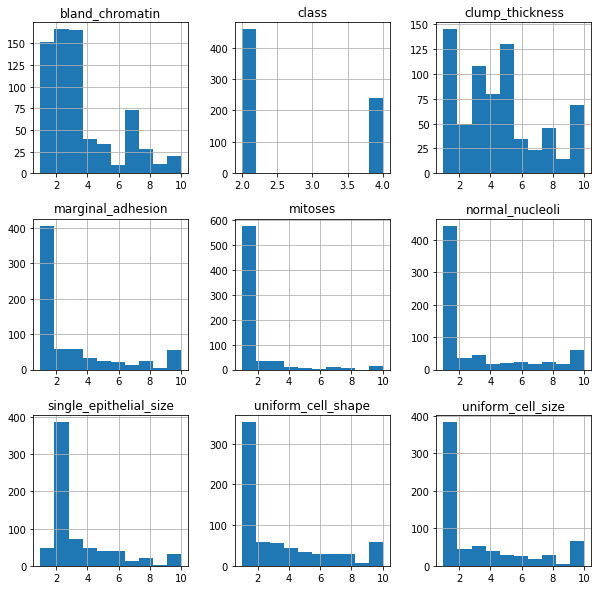

In [30]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

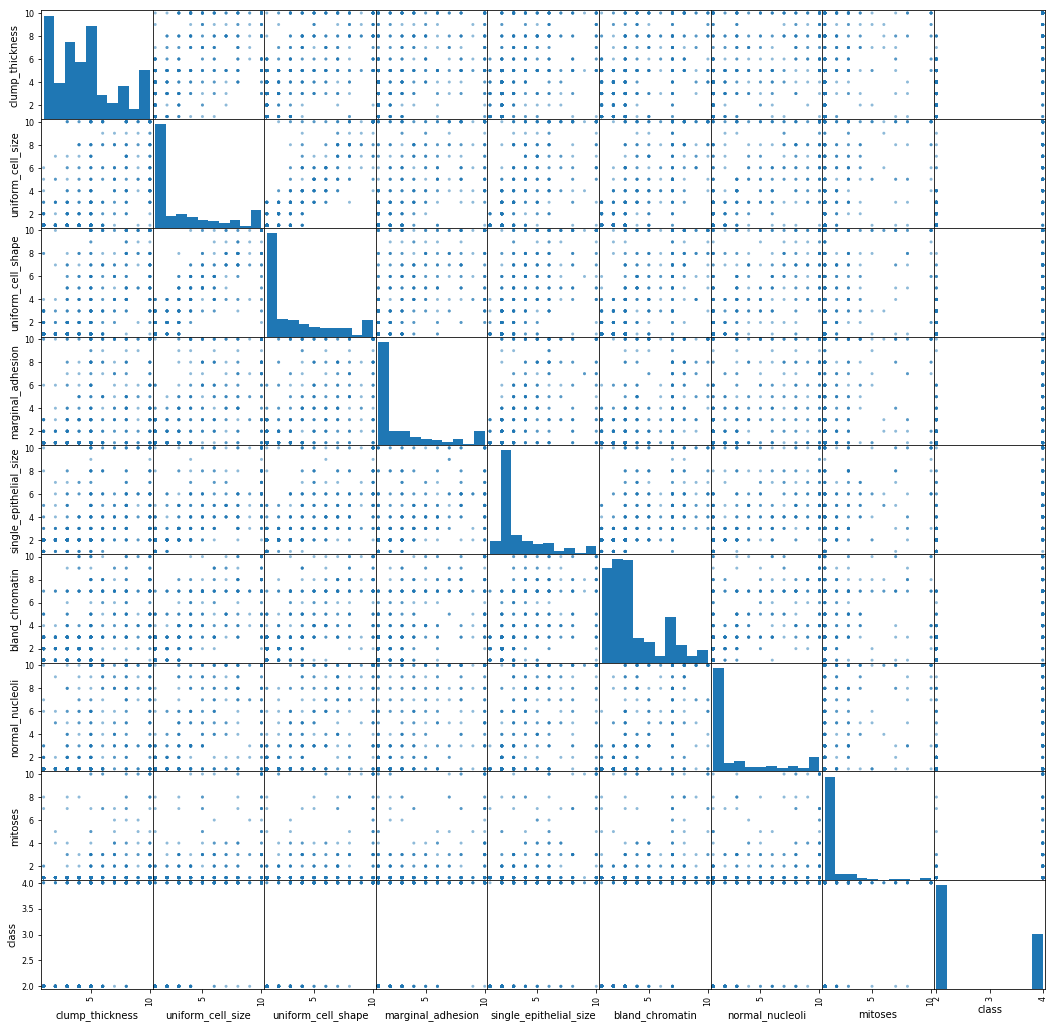

In [31]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [34]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.967760 (0.027510)
SVM: 0.949935 (0.035510)


In [35]:


for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))


KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        90
           4       0.98      0.96      0.97        50

   micro avg       0.98      0.98      0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.91      1.00      0.95        50

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



In [36]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9642857142857143
[2]
